In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tqdm import tqdm
tf.compat.v1.enable_v2_behavior()

from sklearn.decomposition import PCA

In [3]:
from vectorincrement import *

# Testing if PCA works

In [4]:
# creating the environment
n = 2
env = VectorIncrementEnvironment(n=n, k=2, do_transform=True, seed=42)

# collecting observations and states
obs = []
states = []

# 3 episodes
for _ in range(3):
    o = env.reset()
    # 50 steps per episode
    for _ in range(50):
        a = np.random.randint(0, n)
        result = env.step(a)
        obs.append(result['observation'])
        states.append(result['state'])
states = np.array(states)

In [5]:
# Running the PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(obs)

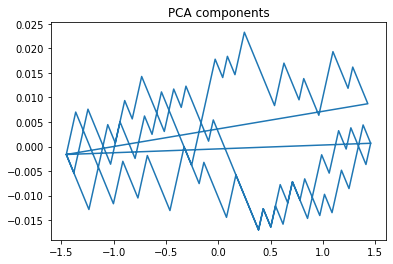

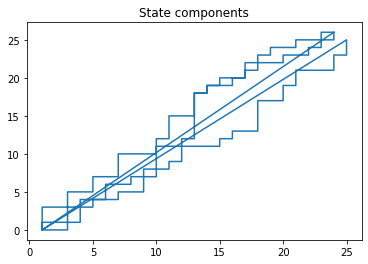

In [6]:
plt.figure()
plt.title('PCA components')
plt.plot(pca[:, 0], pca[:, 1])
plt.show()
plt.figure()
plt.title('State components')
plt.plot(states[:, 0], states[:, 1])
plt.show()

### PCA does not recover the variables we want...

The increase is NOT monotonous